In [1]:
from src.util.io import load_reference_fccs

fcc_Shestov = load_reference_fccs('../../data/fcc/ref_fcc_shestov.txt')
fcc_Komkova = load_reference_fccs('../../data/fcc/ref_fccs_komkova.txt')


## Fig. 7 A global comparison of FCCs between the Shestov-derived model and the GEM-embedded model.

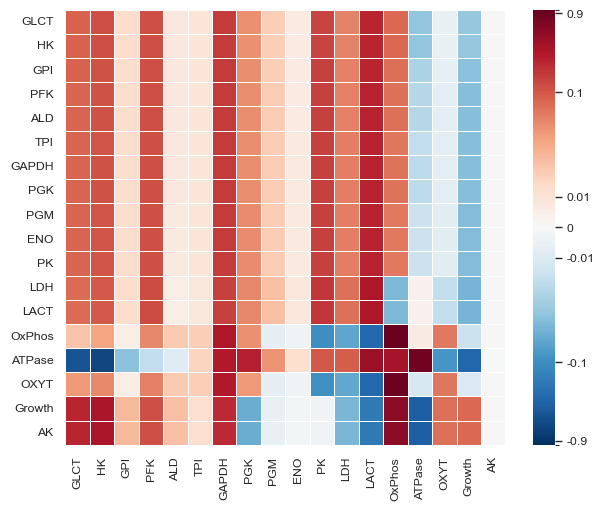

In [2]:
import matplotlib.pyplot as plt
from matplotlib.colors import SymLogNorm
import seaborn as sns

sns.set_context('paper')

vmin = min(fcc_Shestov.min().min(), fcc_Komkova.min().min())
vmax = max(fcc_Shestov.max().max(), fcc_Komkova.max().max())
abs_max = abs(max(vmin, vmax))

fig, axes = plt.subplots(figsize=(7.1, 5.65))

norm = SymLogNorm(linthresh=0.03, vmin=-abs_max, vmax=abs_max, base=10)
sns.heatmap(
    fcc_Komkova, cmap='RdBu_r', annot=False, fmt=".2f", norm=norm, annot_kws={"size": 8},
    linewidths=0.5, cbar=True, cbar_kws={ "aspect": 20}
)

cbar = plt.gca().collections[0].colorbar

ticks = [-0.9, -0.1, -0.01, 0, 0.01, 0.1, 0.9]
cbar.set_ticks(ticks)
cbar.set_ticklabels([f"{t:.2g}" for t in ticks])

path = '../../out/ref_fccs_komkova.png'
plt.savefig(path, bbox_inches='tight', transparent=True, pad_inches=0.1, dpi=300)
plt.show()


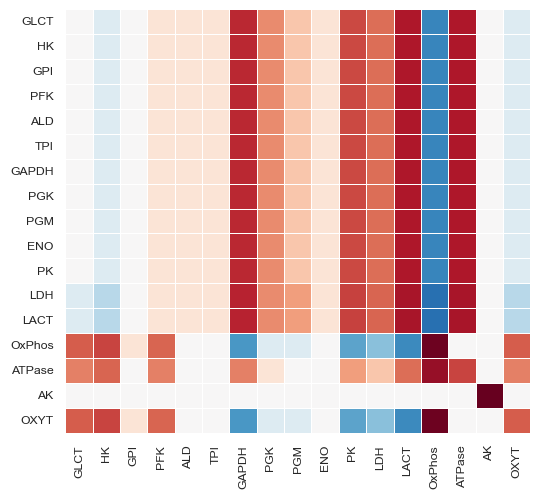

In [3]:
plt.figure(figsize=(6, 5.5))
sns.heatmap(round(fcc_Shestov, 2), cmap='RdBu_r', annot=False,
            annot_kws={"size": 8}, linewidths=0.5, norm=norm, cbar=False)

path = '../../out/ref_fccs_shestov.png'
plt.savefig(path, bbox_inches='tight', transparent=True, pad_inches=0.1, dpi=300)
plt.show()

## Fig. 8 A global comparison of FCCs shown in Fig. 7 between the Shestov-derived model and the GEM-embedded model.

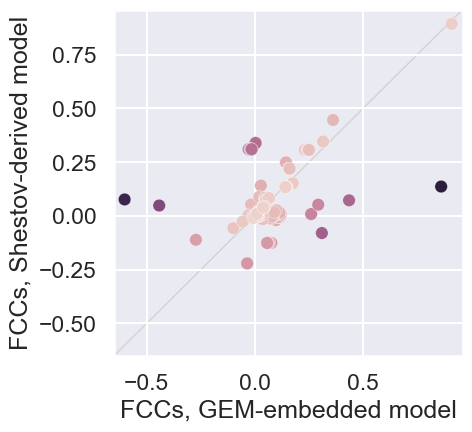

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np


def to_dict(df: pd.DataFrame) -> dict:
    result = {}

    for c, values_by_index in df.to_dict().items():
        for i, v in values_by_index.items():
            if (i not in ['AK', 'OXYT']) and (c not in ['AK', 'OXYT']):
                key = f"{i},{c}"
                result[key] = v
    return result


df = pd.DataFrame({'komkova': to_dict(fcc_Komkova), "shestov": to_dict(fcc_Shestov)})
min_fcc = df.min().min() - 0.05
max_fcc = df.max().max() + 0.05

df['Deviation'] = df.apply(lambda row: abs(row.komkova - row.shestov), axis=1)
df.sort_values(by='Deviation', ascending=False, inplace=True)
df.dropna(inplace=True)

sns.set_context('talk')
plt.figure(figsize=(4.5, 4.5))

xline = np.linspace(min_fcc, max_fcc, 100)
ax = sns.lineplot(x=xline, y=xline, c='#d3d3d3', lw=1)
plt.setp(ax.lines, zorder=0)

ax = sns.scatterplot(df, x="komkova", y="shestov", hue='Deviation', linewidth=0.2)

plt.xlabel('FCCs, GEM-embedded model')
plt.ylabel('FCCs, Shestov-derived model')

plt.xlim(min_fcc, max_fcc)
plt.ylim(min_fcc, max_fcc)
plt.legend([], [], frameon=False)

# for index, row in df.head(10).iterrows():
#     plt.annotate(index, (row['komkova'], row['shestov']), fontsize=9)
#     plt.plot(row['komkova'], row['shestov'], marker='o', linestyle='None', color='#d3d3d3')

path = '../../out/ref_MCC.png'
plt.savefig(path, bbox_inches='tight', pad_inches=0.4, dpi=300, transparent=True)
plt.show()
